In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/selfdriving-car-udacity/driving_log.csv
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_16_08_52_465.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/center_2020_04_22_15_55_40_811.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/right_2020_04_22_15_43_12_223.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/right_2020_04_22_15_56_45_545.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_16_00_44_483.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/right_2020_04_22_16_10_35_565.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/center_2020_04_22_15_56_16_829.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_15_42_11_578.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_16_09_44_493.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_16_10_35_187.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/left_2020_04_22_15_56_52_160.jpg
/kaggle/input/selfdriving-car-udacity/IMG/IMG/right_2020_04_22_15_55_3

In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
import tensorflow
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Cropping2D

Using TensorFlow backend.


In [3]:
# Importing Driving csv:
df = pd.read_csv('/kaggle/input/selfdriving-car-udacity/driving_log.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\c...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\l...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\r...,0.0,0.0,0.0,0.000012
1,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\c...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\l...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\r...,0.0,0.0,0.0,0.000004
2,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\c...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\l...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\r...,0.0,0.0,0.0,0.000002
3,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\c...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\l...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\r...,0.0,0.0,0.0,0.000013
4,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\c...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\l...,C:\Users\Tushar Goel\Desktop\windows_sim\IMG\r...,0.0,0.0,0.0,0.000003


In [4]:
#Let's prepare the Dataset
from IPython.display import clear_output
images = []
angles = []
for i in range(df.shape[0]):
    clear_output(wait=True)
    im_c_path = '/kaggle/input/selfdriving-car-udacity/IMG/IMG/'+str(df[0][i].split('\\')[-1])
    im_l_path = '/kaggle/input/selfdriving-car-udacity/IMG/IMG/'+str(df[1][i].split('\\')[-1])
    im_r_path = '/kaggle/input/selfdriving-car-udacity/IMG/IMG/'+str(df[2][i].split('\\')[-1])
    print(f'Loading {i+1} image')
    print(im_c_path)
    im_c = cv2.imread(im_c_path)
    im_l = cv2.imread(im_l_path)
    im_r = cv2.imread(im_r_path)

    images.append(im_c)
    images.append(im_l)
    images.append(im_r)
    
    angles.append(df[3][i])
    angles.append(df[3][i])
    angles.append(df[3][i])
print('Done')

Loading 6006 image
/kaggle/input/selfdriving-car-udacity/IMG/IMG/center_2020_04_22_16_12_17_686.jpg
Done


In [5]:
a = len(angles)
images = np.asarray(images)
angles = np.asarray(angles).reshape(a,1)
print('Done')

Done


In [6]:
model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(2, 2), activation='relu',input_shape=(160,320,3)))
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu'))


model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512))

model.add(Dense(256))
model.add(Dense(256))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 158, 64)       4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 77, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 17, 32)         25632     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [7]:
model.compile(loss='mse',optimizer='rmsprop')
history = model.fit(images,angles,epochs = 15,validation_split=0.2,shuffle=True)

Train on 14414 samples, validate on 3604 samples
Epoch 1/15
14414/14414 [==============================] - 16s 1ms/step - loss: 3102.3356 - val_loss: 0.0243
Epoch 2/15
14414/14414 [==============================] - 13s 898us/step - loss: 0.1018 - val_loss: 0.0271
Epoch 3/15
14414/14414 [==============================] - 13s 906us/step - loss: 0.1013 - val_loss: 0.0247
Epoch 4/15
14414/14414 [==============================] - 13s 929us/step - loss: 0.1010 - val_loss: 0.0247
Epoch 5/15
14414/14414 [==============================] - 13s 905us/step - loss: 0.1010 - val_loss: 0.0250
Epoch 6/15
14414/14414 [==============================] - 13s 914us/step - loss: 0.1011 - val_loss: 0.0249
Epoch 7/15
14414/14414 [==============================] - 13s 907us/step - loss: 0.1011 - val_loss: 0.0243
Epoch 8/15
14414/14414 [==============================] - 13s 898us/step - loss: 0.1011 - val_loss: 0.0243
Epoch 9/15
14414/14414 [==============================] - 13s 931us/step - loss: 0.1010 - val_

In [8]:
model.save('model.h5')

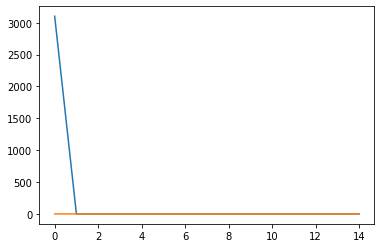

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()